# Import Package

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,Dense,MaxPooling2D,AveragePooling2D,Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Mnits DataSets

In [2]:
mnit = keras.datasets.mnist

# Split Test and Train

In [36]:
(x_train,y_train),(x_test,y_test) = mnit.load_data()

1


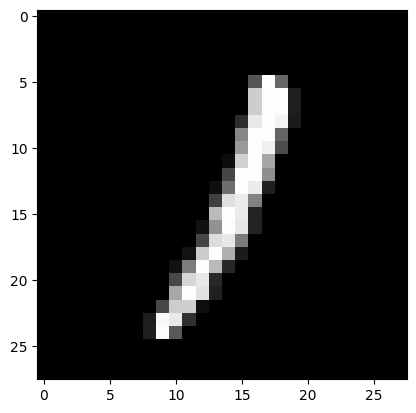

In [17]:
index = 99
img = x_train[index]
print(y_train[index])
plt.imshow(img,cmap="gray")

# Normalize

In [42]:
x_train = x_train.reshape((-1,28,28,1)).astype("float32")
x_test = x_test.reshape((-1,28,28,1)).astype("float32")

(10000, 28, 28, 1)

# 1) Model

In [46]:
model = keras.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",strides=(1,1),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",strides=(1,1),activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=120,activation="relu"))
model.add(Dense(units=10,activation='softmax'))

# Compile

In [47]:
model.compile(optimizer='adam',loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

# Summart

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 128)        

# Train Model

In [49]:
hist = model.fit(x_train,y_train,epochs=100,batch_size=264,validation_data=(x_test,y_test))

Epoch 1/100
228/228 [==============================] - 7s 13ms/step - loss: 0.4905 - accuracy: 0.8897 - val_loss: 0.1006 - val_accuracy: 0.9668
Epoch 2/100
228/228 [==============================] - 2s 8ms/step - loss: 0.0912 - accuracy: 0.9724 - val_loss: 0.0889 - val_accuracy: 0.9718
Epoch 3/100
228/228 [==============================] - 2s 7ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.0711 - val_accuracy: 0.9783
Epoch 4/100
228/228 [==============================] - 2s 7ms/step - loss: 0.0511 - accuracy: 0.9838 - val_loss: 0.0577 - val_accuracy: 0.9820
Epoch 5/100
228/228 [==============================] - 2s 7ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0569 - val_accuracy: 0.9832
Epoch 6/100
228/228 [==============================] - 2s 7ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0594 - val_accuracy: 0.9831
Epoch 7/100
228/228 [==============================] - 2s 7ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0496 - val_accuracy: 0.985

# Save

In [51]:
model.save("mnits_Conv2D.h5")

# Load Model

In [13]:
model_load = keras.models.load_model("mnits_Conv2D.h5")

# History

In [52]:
acc = hist.history['accuracy']
acc_val = hist.history['val_accuracy']
loss = hist.history['loss']
loss_val = hist.history['val_loss']


# accuracy

In [53]:
accuracy = model.evaluate(x_test,y_test)
accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.1058 - accuracy: 0.9881


[0.10578881949186325, 0.988099992275238]

# Plot

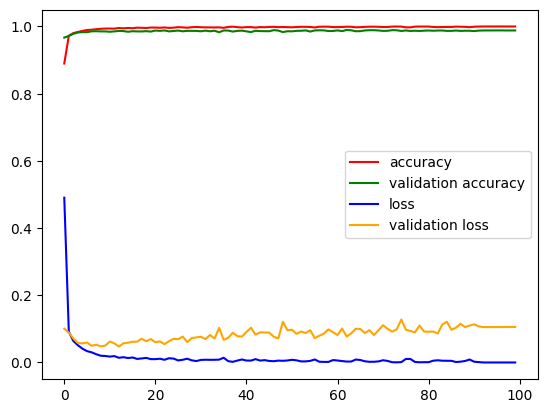

In [54]:
plt.plot(acc,color="red",label="accuracy")
plt.plot(acc_val,color="green",label="validation accuracy")
plt.plot(loss,color="blue",label="loss")
plt.plot(loss_val,color="orange",label="validation loss")
plt.legend()
plt.show()